In [35]:
from math import e
from numpy.core.numeric import cross
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import csvTools
from sklearn.model_selection import cross_val_score
import geopandas as gpd
from sklearn.utils import shuffle
from shapely import wkt

In [36]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [37]:
crs_earth = 'EPSG:4326'
crs_maps = 'EPSG:3857'
crs = crs_maps

In [70]:
thePlantToFind = input('Indtast en plante her: ')

#plant_gdf_grid = csvTools.convert_csv_to_gdf('csv_files\\DK_Plant_10000.csv',True,crs=crs)
#plant_gdf_grid = plant_gdf_grid.drop(columns=['geometry'])
data = csvTools.convert_csv_to_gdf('csv_files/hallofinalcsv.csv',True,crs=crs)

#data = data.geometry.apply(lambda x: wkt.dumps(x))
#geometry = geometry.geometry.apply(lambda x: wkt.dumps(x))


#dataNoPlants = data.drop(columns=plant_gdf_grid.columns)
#print(data.head())

x = np.array(data.drop(columns=[thePlantToFind]))
y = np.array(data[thePlantToFind])

print(x.shape)
print(y.shape)

#x_shuffled = shuffle(x, random_state=42)
#y_shuffled = shuffle(y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

new_x_train = np.delete(x_train, [0, 1, 2, 3], axis = 1)
new_x_test  = np.delete(x_test, [0, 1 , 2, 3], axis = 1)


k = 8
kf = KFold(n_splits=k, random_state=None)

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

rfc = RandomForestClassifier(n_estimators = 1000, random_state= 42)
rfc.fit(new_x_train, y_train)

predictions = rfc.predict(new_x_test)
probality = rfc.predict_proba(new_x_test)

Indtast en plante her:  Salix caprea


      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
0              0             0               0   
1              1             1               1   
2              2             2               2   
3              3             3               3   
4              4             4               4   
...          ...           ...             ...   
1668        1668          1668            1668   
1669        1669          1669            1669   
1670        1670          1670            1670   
1671        1671          1671            1671   
1672        1672          1672            1672   

                                               geometry  
0     POLYGON ((908433.435 7466684.862, 908433.435 7...  
1     POLYGON ((908433.435 7476684.862, 908433.435 7...  
2     POLYGON ((908433.435 7486684.862, 908433.435 7...  
3     POLYGON ((908433.435 7496684.862, 908433.435 7...  
4     POLYGON ((918433.435 7456684.862, 918433.435 7...  
...                                                

In [89]:
trueplots = []
for index, values in enumerate(predictions):
    if values:
        geo = x_test[index][3]
        trueplots.append(geo)
        
dataplot = pd.DataFrame({'geometry':trueplots})
dataplot.to_csv('csv_files\\dataplottes.csv')
print(dataplot)


print('accuracy score of training set: ', accuracy_score(y_train, rfc.predict(new_x_train)))
print('accuracy score of test set: ', accuracy_score(y_test, predictions))
print('confusion matrix: ')
print(confusion_matrix(y_test,predictions))
print_confusion_matrix(y_test,predictions)

                                              geometry
0    POLYGON ((1068433.434877821 7436684.861747535,...
1    POLYGON ((1138433.434877821 7436684.861747535,...
2    POLYGON ((1008433.434877821 7686684.861747535,...
3    POLYGON ((1408433.434877821 7556684.861747535,...
4    POLYGON ((998433.4348778214 7676684.861747535,...
..                                                 ...
238  POLYGON ((1258433.434877821 7426684.861747535,...
239  POLYGON ((1328433.434877821 7316684.861747535,...
240  POLYGON ((1118433.434877821 7586684.861747535,...
241  POLYGON ((1068433.434877821 7736684.861747535,...
242  POLYGON ((1058433.434877821 7676684.861747535,...

[243 rows x 1 columns]
accuracy score of training set:  1.0
accuracy score of test set:  0.7613365155131265
confusion matrix: 
[[133  57]
 [ 43 186]]
True positive =  133
False positive =  57
False negative =  43
True negative =  186


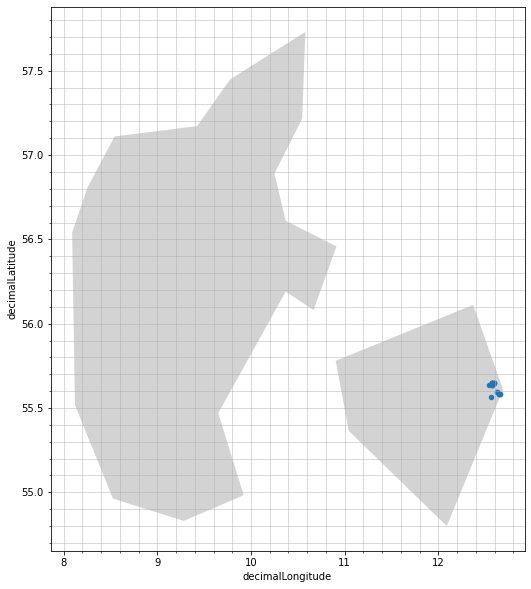

In [6]:
plants = pd.read_csv('data/data_with_lat_long.csv', engine='python')
plantsdub = plants[(plants['species']!=thePlantToFind)].index
plants.drop(plantsdub, inplace=True)

#Make axis :O
fig, ax = plt.subplots(1, figsize=(10,10))

#plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Denmark"].plot(color="lightgrey", ax=ax)

plants.plot(x="decimalLongitude", y="decimalLatitude", kind="scatter", colormap='PiYG', ax=ax)

#add grid XD
ax.grid(which = "major", b=True, alpha=0.6)
plt.minorticks_on()
ax.grid(which = "minor", b=True, alpha=0.6)

plt.show()